#### Homework for Econ 611
Choose 9 stocks of your choice and create a notebook with the same visualizations. 
Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution..

#### Solution about the homework 

I will start to set the statistics function first and then download the data from yahoo finace to get access the 9 stocks. 
And then make visualtion and plot the distribution to analyze thes 9 stocks. 

In [1]:
# functions are very important tool for computing and they allow us to resue code 
# define the functions for total, mean, median, variance, std, covariance, correlation, skewness and kurtosis
# we just define the function without assinging any data yet, this will leave it later useage once when the data is ready. 

def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    # caculating a median has to sort the data first 
    list_obj = sorted(list_obj)
    # classify the lengthe of the list is even or odd 
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def variance(list_obj, sample = False):
#it measures how far each observation in the set is from the mean
#caculating the variance, we have to know the list mean 
# normally, we do not know the population parameters, we have to use the sample mean and variance to represent the total 
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

# with regards to the reasearch, to know the correlation between variables is important.
# to obtain this gola, we have to caculate the covaricen first 
def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check the lengthe equal or not 
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
#Skewness refers to distortion or asymmetry in a symmetrical bell curve 
# IT decides the curve is shifted to the left or to the right
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
# kurtosis measures extreme values in either tail.
    mean_ = mean(lst_obj)
    SD_   = SD(lst_obj, sample)
    n     = len(lst_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt


In [2]:
# create a function for gathering statistics for variables in a dataframe 
# the function is similar to combine all the statistics functions for each variable 
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

In [3]:
#Import financial data from Yahoo Finance using pandas_dataread
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["FB", "TWTR", "INTC", "DOYU", "T","F","GE","AMD","AAL"]
# Facebook,Twitter,Intel, DouYu, AT&T Inc, Ford Motor Company, GE, Advanced Micro Devices， American Airlines Group
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)
    # save the closing data for those nine stocks in a single dataframe.
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data  

,FB,TWTR,INTC,DOYU,T,F,GE,AMD,AAL
Date,,,,,,,,,
2014-01-02,54.709999,67.500000,25.790001,NaN,34.950001,15.44,26.442308,3.950000,25.360001
2014-01-03,54.560001,69.000000,25.780001,NaN,34.799999,15.51,26.423077,4.000000,26.540001
2014-01-06,57.200001,66.290001,25.459999,NaN,34.959999,15.58,26.211538,4.130000,27.030001
2014-01-07,57.919998,61.459999,25.590000,NaN,34.950001,15.38,26.240385,4.180000,26.910000
2014-01-08,58.230000,59.290001,25.430000,NaN,34.240002,15.54,26.163462,4.180000,27.629999
...,...,...,...,...,...,...,...,...,...
2020-10-07,258.119995,45.869999,52.669998,13.23,28.799999,7.23,6.310000,86.690002,13.070000
2020-10-08,263.760010,46.009998,53.369999,13.44,28.610001,7.35,6.650000,86.510002,13.160000
2020-10-09,264.450012,45.900002,52.820000,14.00,28.320000,7.25,6.840000,83.099998,13.200000


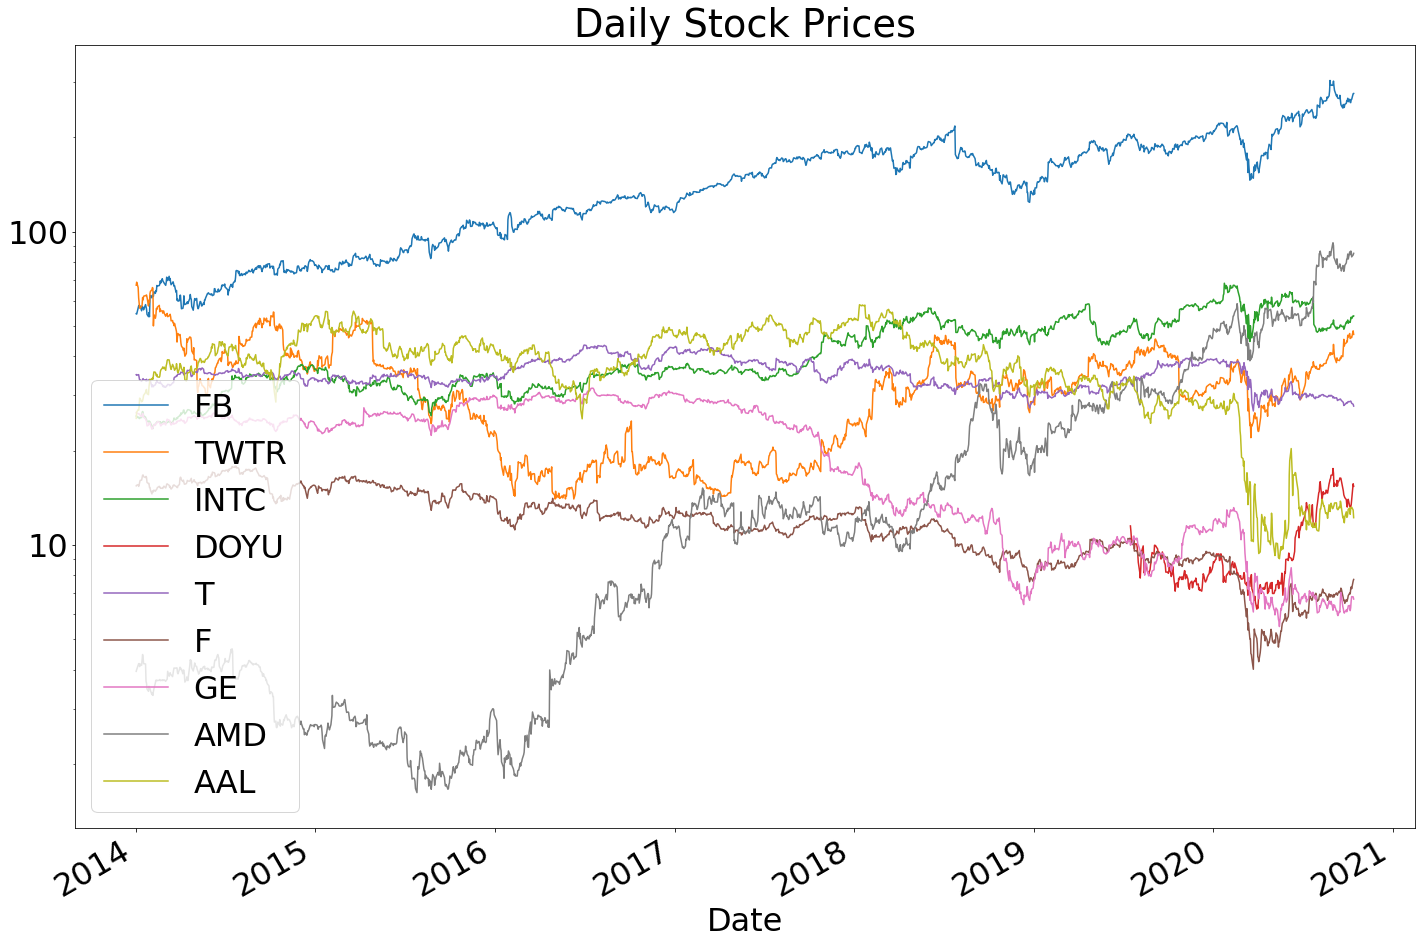

In [4]:
# plotting the data for all nine stocks in one graph 
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

ax.set_yscale("log") # this is for logged values of y axis instead of absolute values
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()


In [5]:
# based on the data we obtain above and transform the data into daily percent change 
# the reason why we do this is for later observing distribution of each stock. 
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100
price_change_data 

,FB,TWTR,INTC,DOYU,T,F,GE,AMD,AAL
Date,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.274169,2.222222,-0.038776,NaN,-0.429189,0.453372,-0.072731,1.265822,4.652998
2014-01-06,4.838708,-3.927535,-1.241278,NaN,0.459770,0.451320,-0.800582,3.250003,1.846269
2014-01-07,1.258737,-7.286170,0.510609,NaN,-0.028599,-1.283696,0.110054,1.210647,-0.443954
2014-01-08,0.535223,-3.530749,-0.625244,NaN,-2.031471,1.040311,-0.293149,0.000000,2.675583
...,...,...,...,...,...,...,...,...,...
2020-10-07,-0.208772,0.592106,2.530658,0.075637,0.313480,3.581662,2.269042,2.616003,4.309657
2020-10-08,2.185036,0.305209,1.329031,1.587302,-0.659717,1.659749,5.388275,-0.207637,0.688601
2020-10-09,0.261602,-0.239072,-1.030540,4.166670,-1.013635,-1.360543,2.857144,-3.941745,0.303951


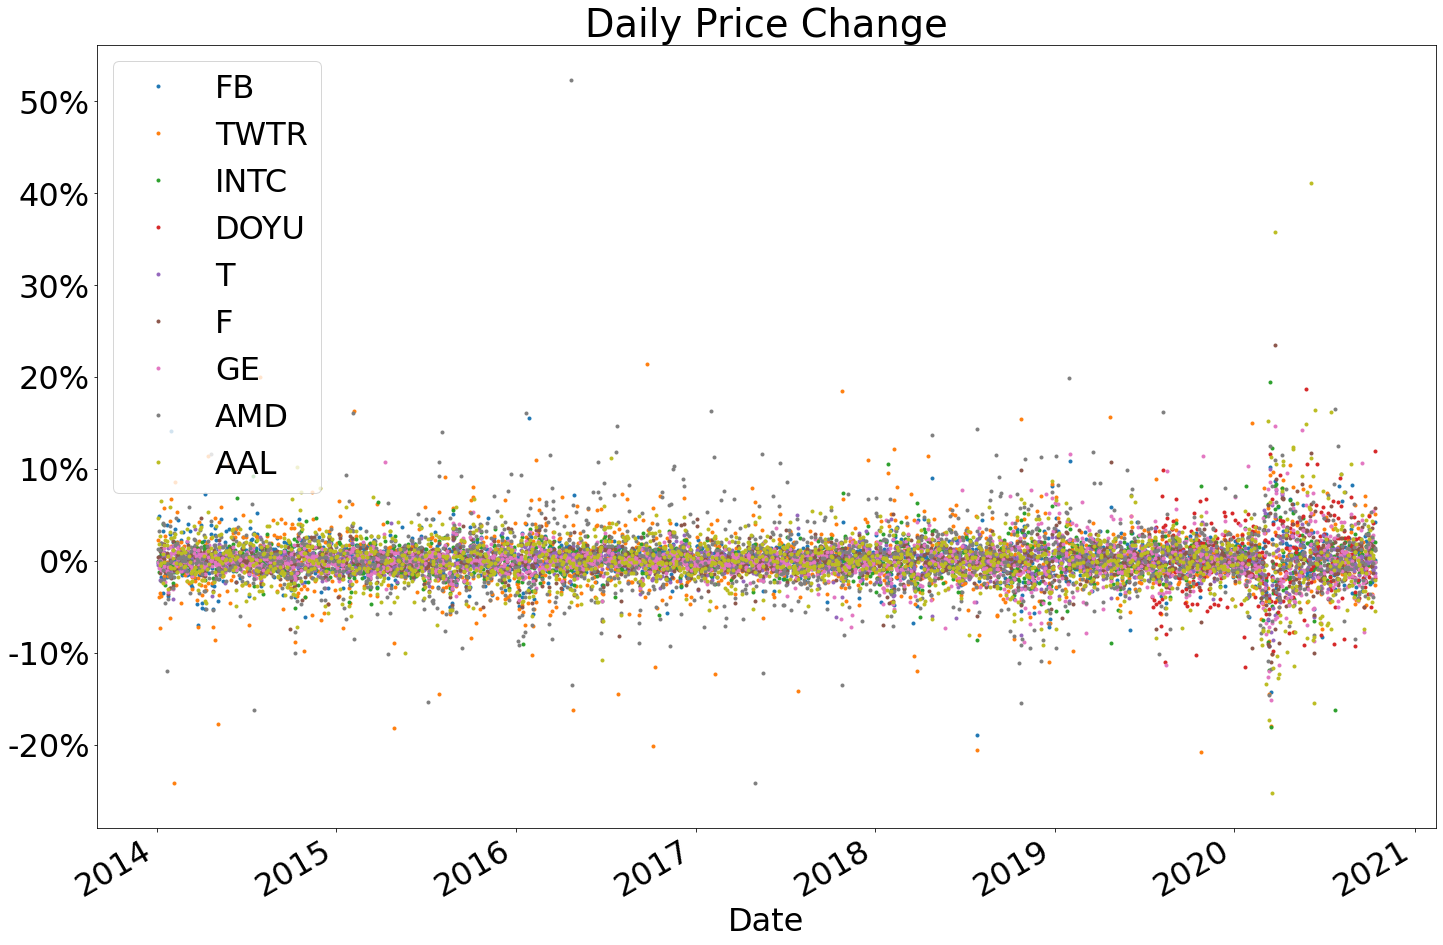

In [6]:
# viewing the transformed data in a timeseries plot will help us to observe the change over time. 
# this line code is to scatter plot over time 
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [7]:
# because we define the statistics at first 
# We can now apply those functions to the daily close price data for all the nine stocks. 
# these statistics include mean, median, variance, SD, skewness and kurtosis 
stats_df = gather_statistics(price_change_data)
stats_df

,FB,TWTR,INTC,DOYU,T,F,GE,AMD,AAL
mean,0.116,0.036,0.062,0.172,-0.005,-0.022,-0.056,0.253,0.008
median,0.120,0.066,0.075,0.109,0.051,0.000,-0.077,0.095,0.000
variance,4.114,11.327,3.709,15.839,1.780,3.731,4.857,15.011,10.459
S.D.,2.028,3.366,1.926,3.980,1.334,1.932,2.204,3.874,3.234
skewness,0.000,-0.011,0.000,-0.010,-0.001,0.001,-0.002,0.000,-0.094
kurtosis,14.335,12.453,20.760,4.658,11.860,20.922,11.523,24.977,31.509


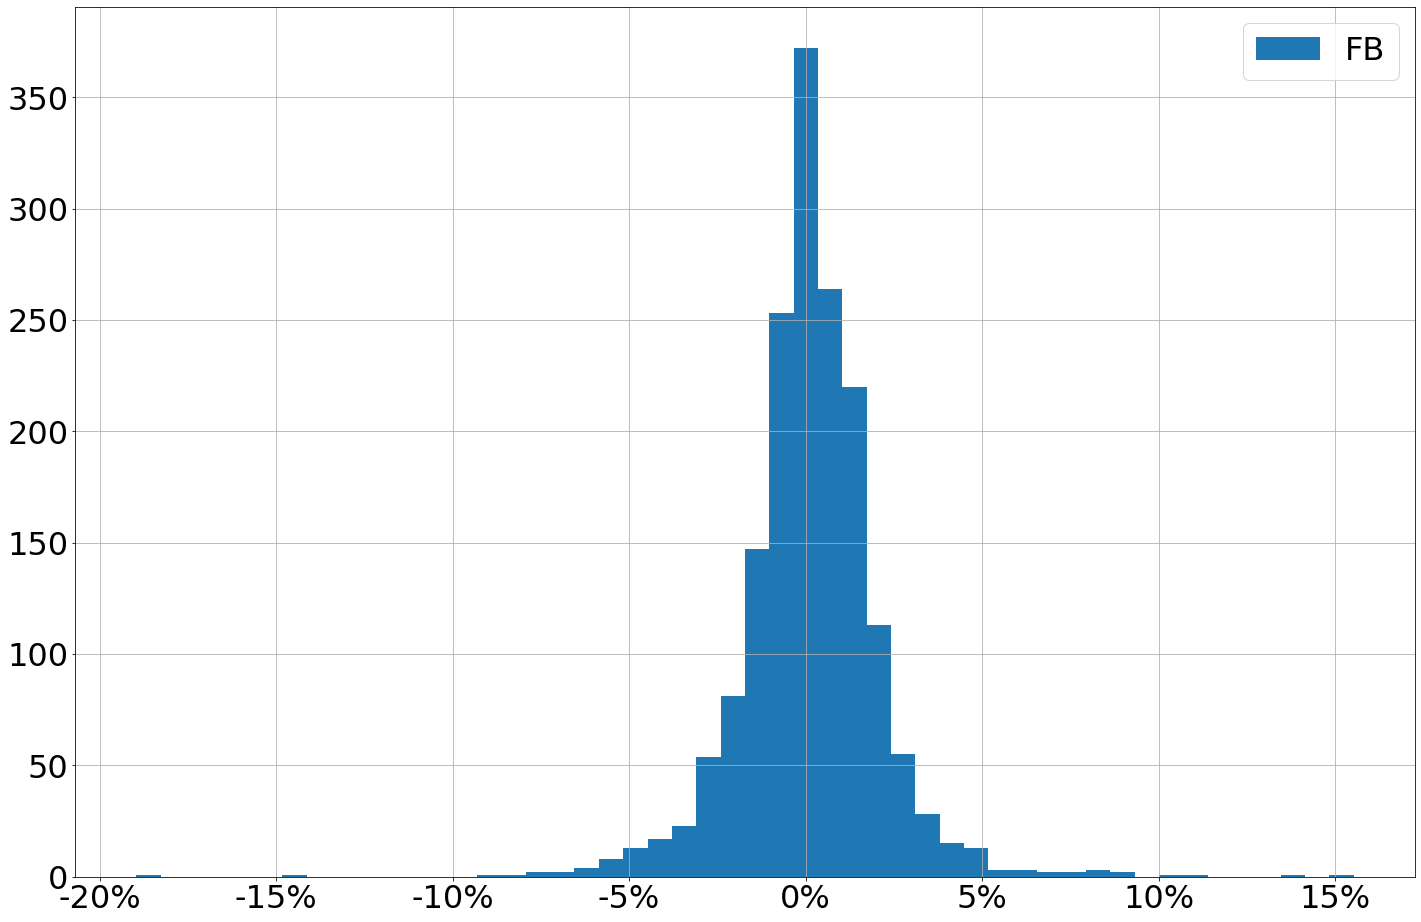

In [9]:
# This line of codes is for histogram creation using pandas about Facebook. 
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["FB"].hist(bins = 50, label = "FB")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

From the histogram of facebook, this meets the assumption that the distribution of daily rate changes of price
is normal distribution over the period in the long run, but we need to compare it with other stocks.

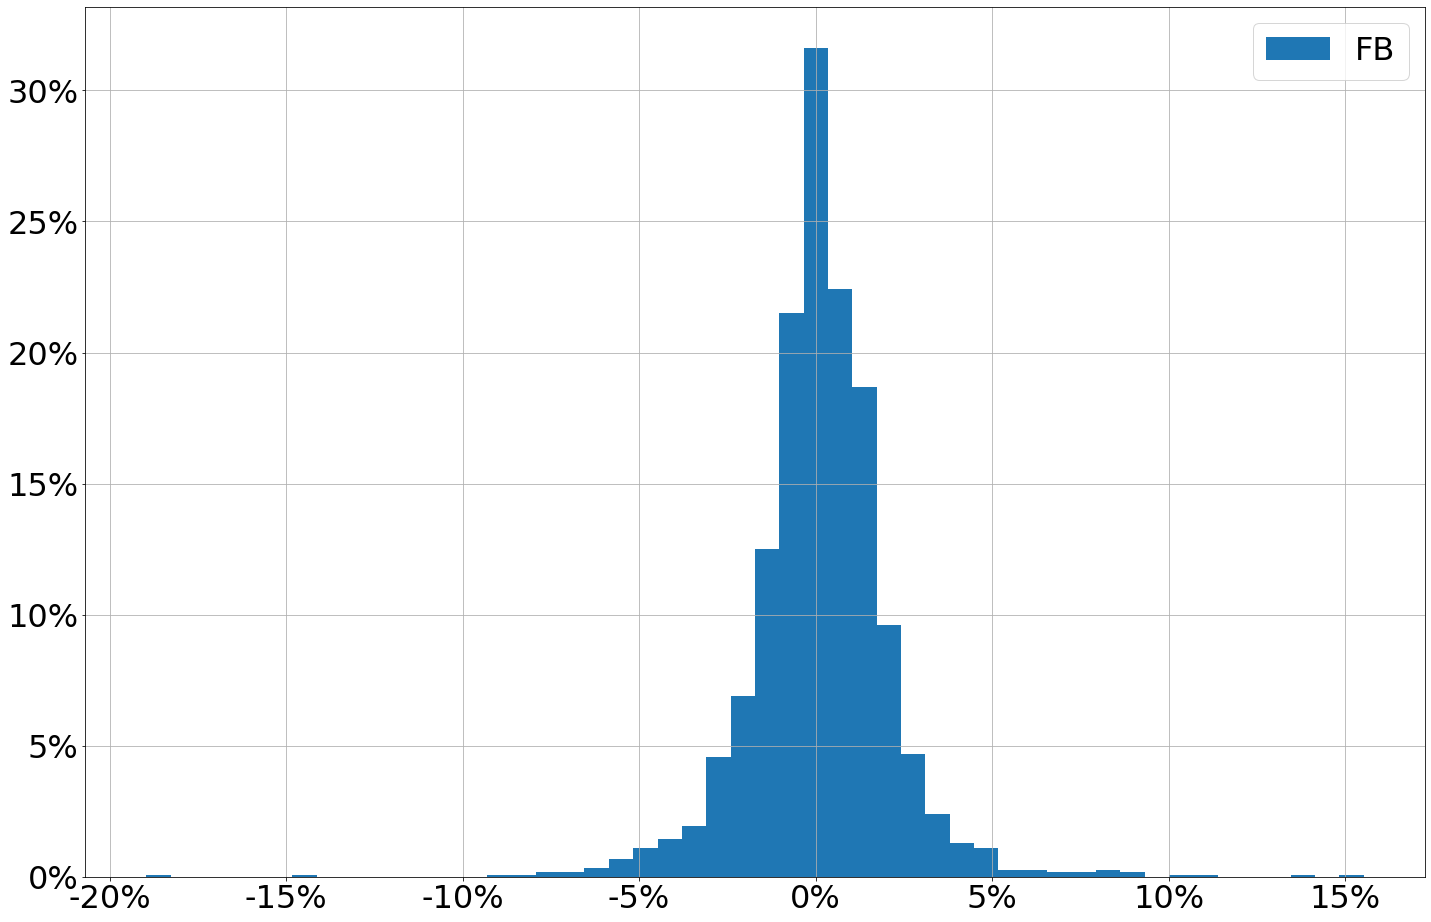

In [10]:
# Transform the histogram into a distribution using density. 
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["FB"].hist(bins = 50, label = "FB", density = True)

# set horizontal and vertical axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A417C918B0>,
      dtype=object)

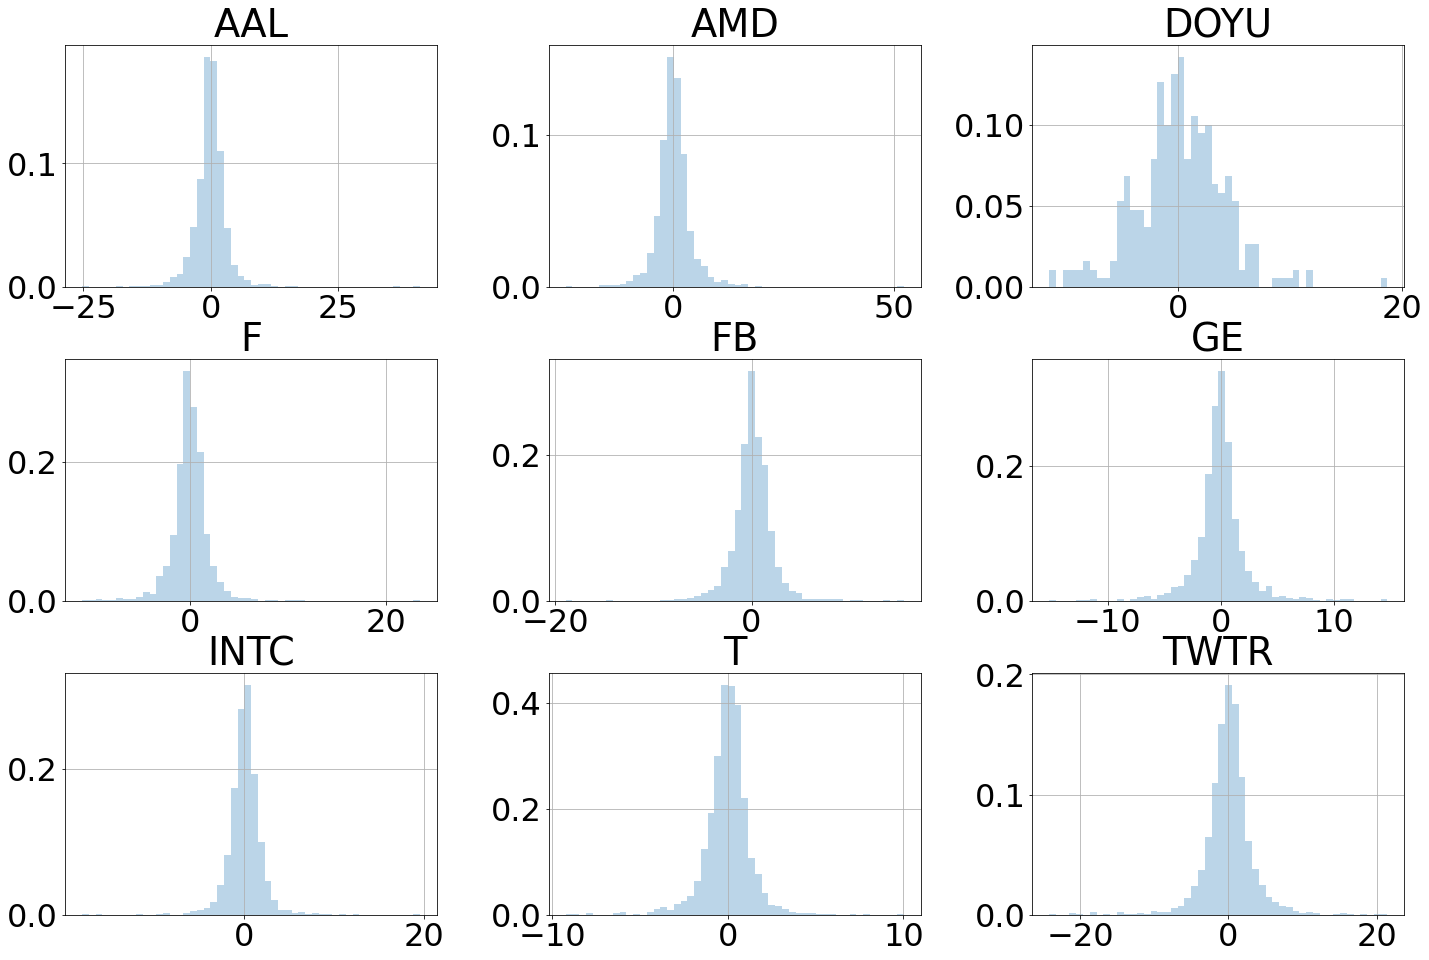

In [13]:
# plotting all the distribution for nine stocks and compare distributions of these stocks
fig, ax = plt.subplots(3,3, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

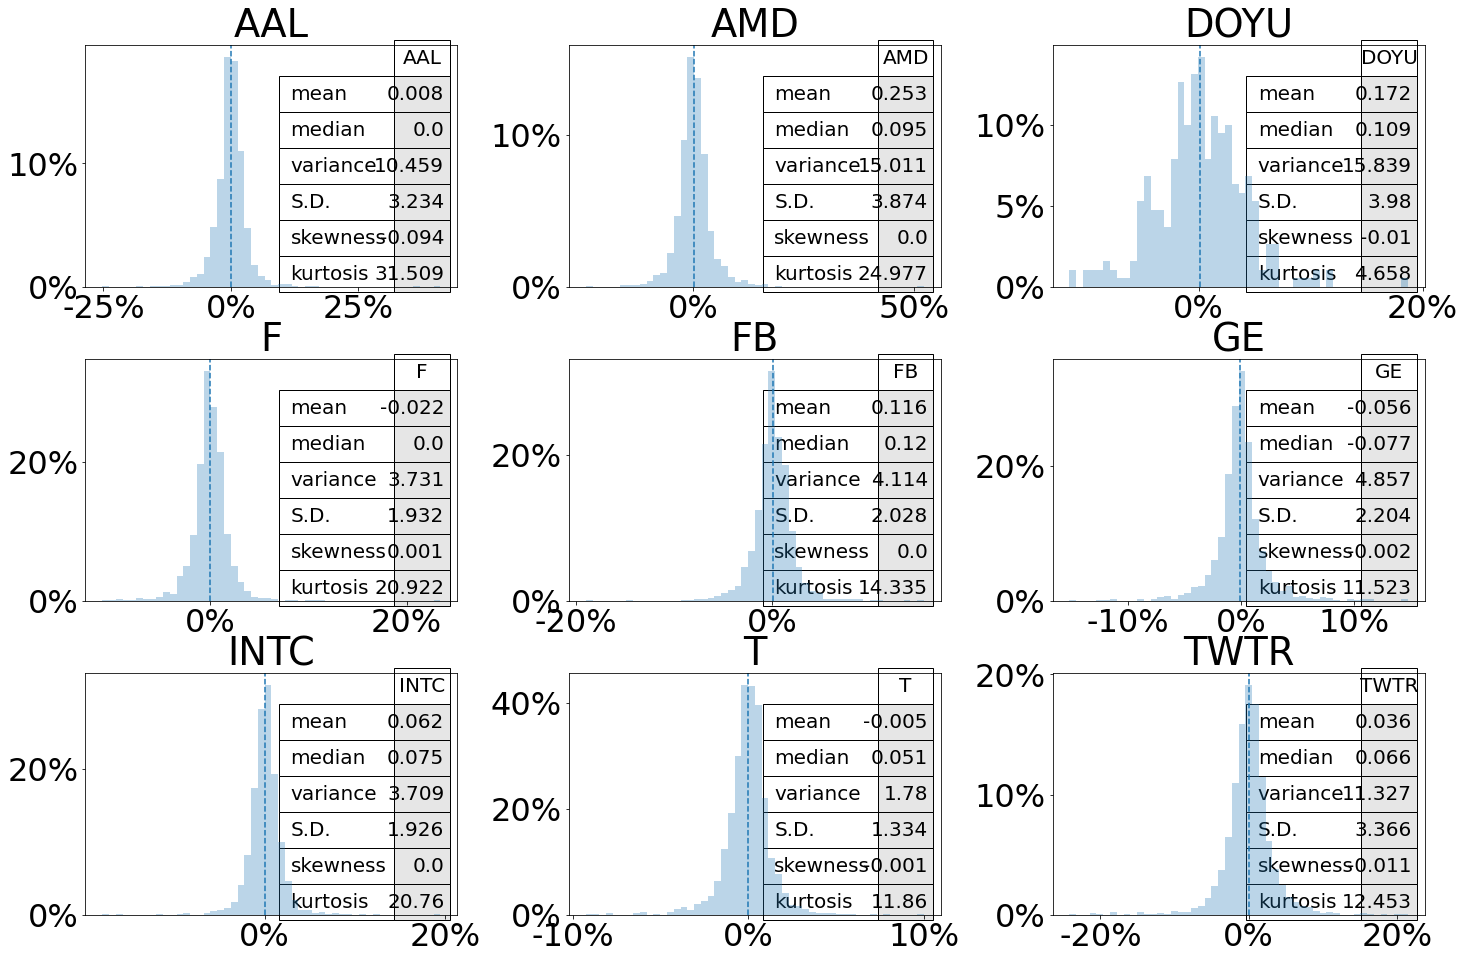

In [14]:
# adding the statistics to those stocks in one plot 
from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (24,16))
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plotting summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        hist_data = stats_df[stock] 
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        a.axvline(x = hist_data.loc["mean"], ls="--")
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)

   
plt.show()

Now it is more convenient to compare all those 9 stocks in one plot. We could observe Douyu has the highest variance but AT&T Inc is the lowest. 
And Twitter, Douyu, AT& T, GE, and AAL have negative skewness while others are zero. 
When a set of approximately normal data is graphed via a histogram,it shows a bell peak and most data within + or - three standard deviations of the mean.
AAL has the highest kurtosis,the tails extend father than the positive and negative standard deviation of the normal distribution 
This impplies for investors, there will occasional extreme returns. The second highest kurtosis is AMD.
Very interesting stock is Douyu, which has the lowest kurtosis, this implies the stock price is relaively stable. However, this stock has the highest variance. 

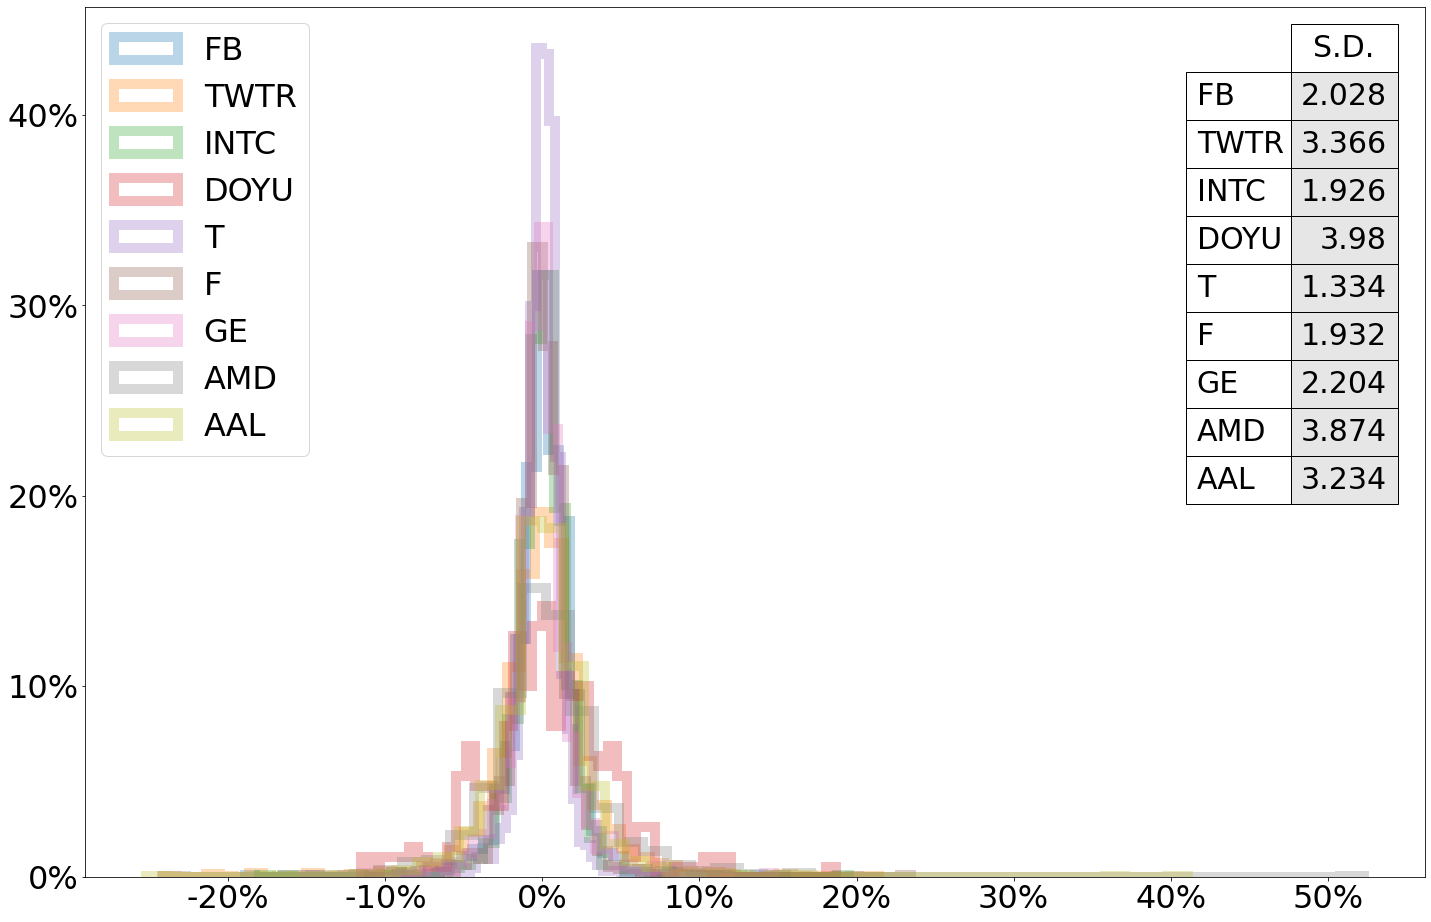

In [30]:
fig, ax = plt.subplots(figsize = (24,16))
# this line of code is for distribution plots about all the stocks on one figure 
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
# to convert the values on the x and y axis to strings 
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# use a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "upper right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)

# grild line disappears 
ax.grid(False)

# move the legend to the upper left, without doing this, it will overlap with SD table. 
plt.legend(loc = "upper left")

In [ ]:
Plotting all 9 stocks in one figure by adding the standard deviation seems easier to compare the distribution. 
For example, Douyu has the largest standard deviation, and its distrbution is much fatter while AT&T has the smallest standard deviation,
the distribution seems much narrower. 

In [ ]:
# create a figure
fig, ax = plt.subplots(figsize = (24, 16))

# plot distribution of each price data on the figure
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = 0.4, 
                                label = key, linewidth = 6, density = True)
    
# set x-values as a percent
x_vals = ax.get_xticks()

# transform values on the x and y-axis to a string with %
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)

y_vals = ax.get_yticks()
y_vals = [str(int(y * 100)) + "%" for y in y_vals]
ax.set_yticklabels(y_vals)

# add a table with the standard dev. of all 9 stocks
stats = table(ax, stats_df.loc["SD"], colWidths = [0.1], cellColours = [[("#98b4d4")]] * 9, loc = "upper right")

# rescale dimension x and y in table (resize the table)
stats.scale(0.8, 4)

#Turn off auto font size feature
stats.auto_set_font_size(False)

#set a font size
stats.set_fontsize(18)

# turn gridlines off
ax.grid(False)

#legend draws from label values passed in df.hist()
plt.legend(loc = "upper left")
    

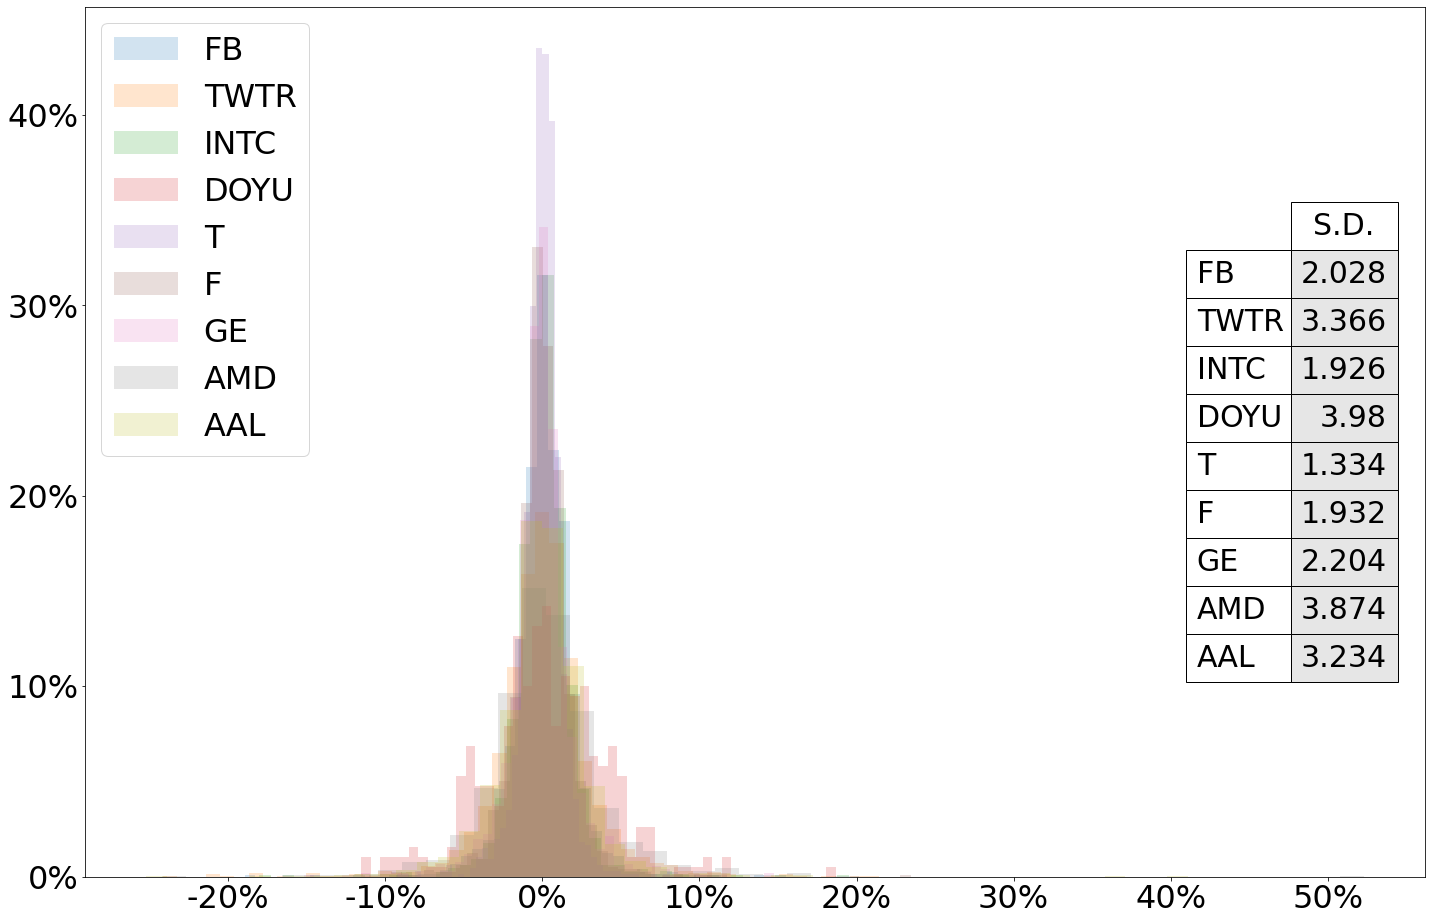

In [31]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend(loc = "upper left")